In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import itertools
# the maximum length of sequence that will be calculated
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
MAXLENGTH = 3
import matplotlib

In [29]:
import wmodelsymm_test as w #my python module that does the chisqr calc for the symm model

In [30]:
reload(w)

<module 'wmodelsymm_test' from 'wmodelsymm_test.pyc'>

In [31]:
## declaring some constants
# number of obsevation sessions (imod in the fortran program)
n_sessions = 26

rad = 57.2957795

contour_levels = np.array([0.35,0.4,0.5,0.6,0.7,0.8,0.9,0.9,0.7,0.5,1.0,0.3,0.15,0.05])
# longitudinal angle (in degrees) [see WT02 Fig.1]
# for contour levels 
rr = np.array([4.9,5.21,5.72,6.06,6.37,6.65,7.00,8.2,8.7,9.13,
    7.66,9.6,10.12,10.93])
rr = rr/rad

# Using the new(latest) bestfit parameters and plot the residuals

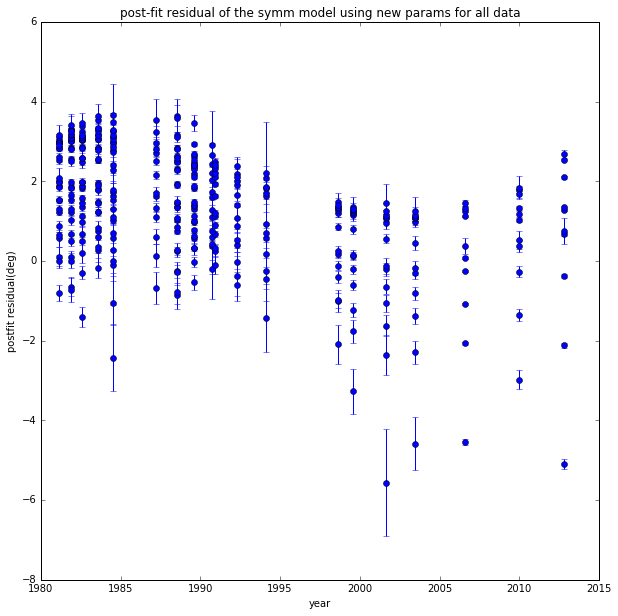

In [36]:
year_data, contour_index_data, width_data, sigma_data = w.read_width_dat('width.dat')
# params = {'xi':47.2/rad,'alpha':157.5/rad,'delta':21.1/rad,'t0':1981.0,'afac':5.57/rad,
#         'bigr':1.59, 'rhofac':1.04}
params = {'xi':47.2/rad,'alpha':144.002/rad,'delta':14.342/rad,
        't0':1942.281,'afac':6.265/rad,'bigr':1.542,'rhofac':1.431}
mask = (sigma_data<10.0)& (sigma_data>0.01)
w0,chisqr = w.calculate_chisqr(year_data[mask],contour_index_data[mask],width_data[mask],sigma_data[mask],params)
plt.errorbar(year_data[mask],width_data[mask]-w0,yerr=sigma_data[mask],fmt='o')
plt.title('post-fit residual of the symm model using new params for all data')
plt.xlabel('year')
plt.ylabel('postfit residual(deg)')

## Now with coloring but without the error bars (because matplotlib sucks at doing colors)! yellow means small contour_index and purple means large contour_index, but this plot complements the plot above in that it shows another dimension (contour_index).
## you wonder what contour_index is, it is the index of the contour levels we/you chose starting from the left edge of the profile, i.e. indices to the rr array
## meaning the residuals are either contour-correlated (the left-edge has positive residual and the right-edge has negative residuals) or systematic

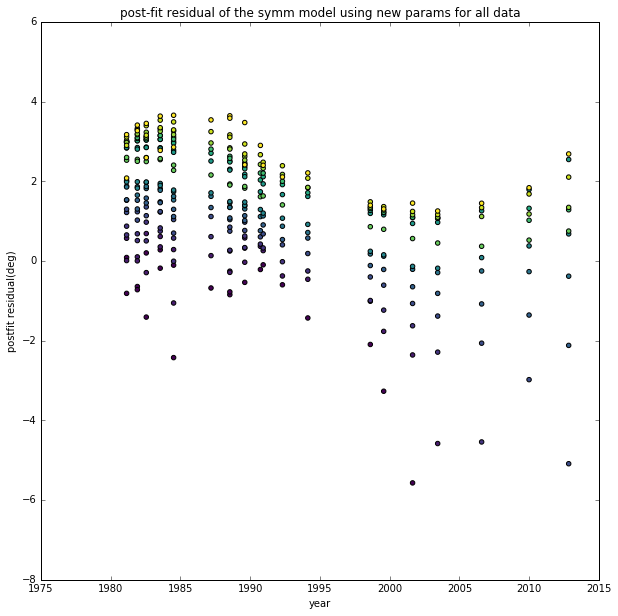

In [37]:
plt.scatter(year_data[mask],width_data[mask]-w0,c=contour_index_data[mask],cmap='viridis')
plt.title('post-fit residual of the symm model using new params for all data')
plt.xlabel('year')
plt.ylabel('postfit residual(deg)')

# plotting the residuals using parameters from wt02

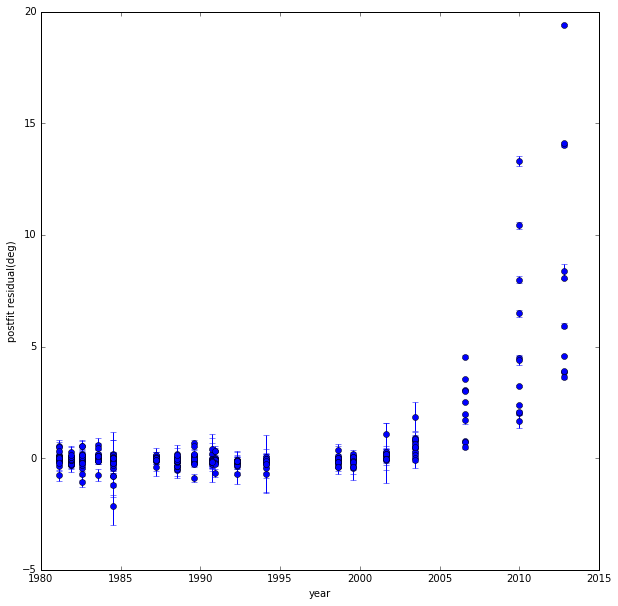

In [38]:
year_data, contour_index_data, width_data, sigma_data = w.read_width_dat('width.dat')
params = {'xi':47.2/rad,'alpha':157.5/rad,'delta':21.1/rad,'t0':1981.0,'afac':5.57/rad,
        'bigr':1.59, 'rhofac':1.04}
mask = (sigma_data<10.0)& (sigma_data>0.01)
w0,chisqr = w.calculate_chisqr(year_data[mask],contour_index_data[mask],width_data[mask],sigma_data[mask],params)
plt.errorbar(year_data[mask],width_data[mask]-w0,yerr=sigma_data[mask],fmt='o')
plt.xlabel('year')
plt.ylabel('postfit residual(deg)')

## To be honest the error bars of the sessions after 2005 look suspiciously small

## Now let's look at the colored plot without the error bars, again yellow->dark means left->right.
## but notice that wmodelsymm fails to find the width (return 0) for a lot of the post-2005 data, so don't take them too seriously

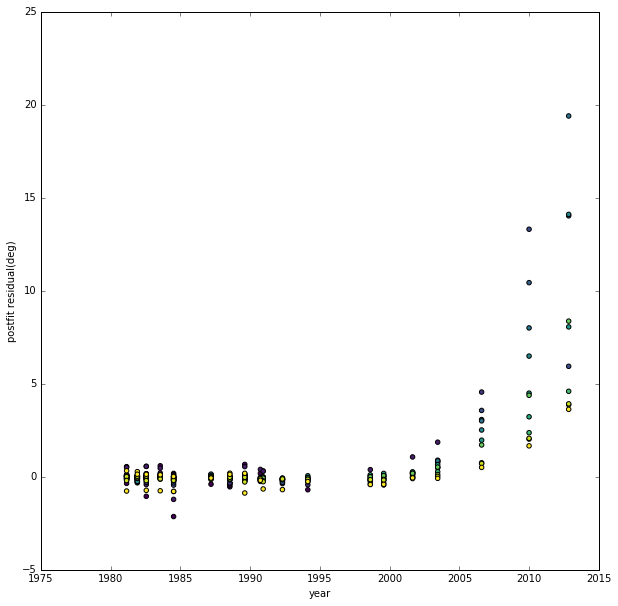

In [35]:
plt.scatter(year_data[mask],width_data[mask]-w0,c=contour_index_data[mask],cmap='viridis')
plt.xlabel('year')
plt.ylabel('postfit residual(deg)')